In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***IMPORTED LIBRARIES***

In [ ]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

***CREATION OF DATA FRAME***

In [106]:
df=pd.read_csv("/content/drive/MyDrive/Datasets ML/IMDB Dataset.csv");

***EDA ON DATA SET***

In [ ]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [108]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


<Axes: xlabel='sentiment', ylabel='count'>

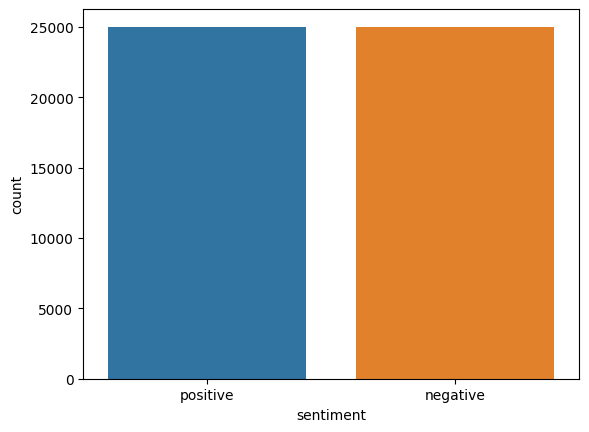

In [107]:
sns.countplot(x='sentiment',data=df)


In [109]:
df['sentiment'].value_counts()


positive    25000
negative    25000
Name: sentiment, dtype: int64

In [110]:
df.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [111]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

***DATA CLEANING ON MOVIE REVIEW DATA SET***

In [112]:
import re
def remove(str):
  str=re.compile(r'<[^>]+>').sub("",str)
  return str

TO REMOVE HTML TAGS AND SYMBOLS

In [113]:
j=0
for i in df["review"]:
  st=remove(i)
  st=st.replace("\'","")
  df["review"][j]=st.upper()
  j+=1

In [114]:
df['review'][1]

'A WONDERFUL LITTLE PRODUCTION. THE FILMING TECHNIQUE IS VERY UNASSUMING- VERY OLD-TIME-BBC FASHION AND GIVES A COMFORTING, AND SOMETIMES DISCOMFORTING, SENSE OF REALISM TO THE ENTIRE PIECE. THE ACTORS ARE EXTREMELY WELL CHOSEN- MICHAEL SHEEN NOT ONLY "HAS GOT ALL THE POLARI" BUT HE HAS ALL THE VOICES DOWN PAT TOO! YOU CAN TRULY SEE THE SEAMLESS EDITING GUIDED BY THE REFERENCES TO WILLIAMS DIARY ENTRIES, NOT ONLY IS IT WELL WORTH THE WATCHING BUT IT IS A TERRIFICLY WRITTEN AND PERFORMED PIECE. A MASTERFUL PRODUCTION ABOUT ONE OF THE GREAT MASTERS OF COMEDY AND HIS LIFE. THE REALISM REALLY COMES HOME WITH THE LITTLE THINGS: THE FANTASY OF THE GUARD WHICH, RATHER THAN USE THE TRADITIONAL DREAM TECHNIQUES REMAINS SOLID THEN DISAPPEARS. IT PLAYS ON OUR KNOWLEDGE AND OUR SENSES, PARTICULARLY WITH THE SCENES CONCERNING ORTON AND HALLIWELL AND THE SETS (PARTICULARLY OF THEIR FLAT WITH HALLIWELLS MURALS DECORATING EVERY SURFACE) ARE TERRIBLY WELL DONE.'

In [115]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))
print(en_stops)

{'a', 'down', 'up', "shouldn't", "couldn't", 'while', 'in', 'by', 'there', "it's", 'be', 'so', "should've", 'did', 'didn', 'below', 've', 'because', 'you', 'no', 'or', 'during', 'ours', 'o', 'it', "didn't", 'i', 'been', 'into', 'how', 'after', 'both', "wouldn't", "doesn't", 'most', 're', 'needn', 't', 'her', 'their', 'between', 'the', "don't", 'for', 'has', 'as', 'doesn', 'each', 'other', 'which', "aren't", 'do', 'ourselves', 'against', 'they', 'll', 'very', 'had', 'was', 'isn', 'just', 'not', 'itself', 'and', 'on', "wasn't", "isn't", 'myself', 'this', 'm', "she's", 'she', 'can', 'few', "hadn't", "you've", 'doing', 'about', 'hadn', "weren't", "won't", 'off', 'will', 'himself', 'only', 'mightn', 'those', 'shan', 'same', "needn't", 'its', 'out', 'before', 'd', 'themselves', 'to', 'why', 'hasn', "mustn't", 'yourselves', 'our', "you're", 'his', 'are', 'until', 'where', 'am', 'couldn', 'don', 'but', 'won', 'own', 'mustn', 'yourself', 'nor', 'my', "shan't", 'from', 'shouldn', 'have', 'were',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [130]:
for i in range(0,len(df)):
   words=df['review'][i].split()
   k=''
   for r in words:
     if r not in en_stops:
       k+=r
       k+=' '
       df['review'][i]=k

In [131]:
df['review'][1]

'A WONDERFUL LITTLE PRODUCTION THE FILMING TECHNIQUE IS VERY UNASSUMING VERY OLD TIME BBC FASHION AND GIVES A COMFORTING AND SOMETIMES DISCOMFORTING SENSE OF REALISM TO THE ENTIRE PIECE THE ACTORS ARE EXTREMELY WELL CHOSEN MICHAEL SHEEN NOT ONLY HAS GOT ALL THE POLARI BUT HE HAS ALL THE VOICES DOWN PAT TOO YOU CAN TRULY SEE THE SEAMLESS EDITING GUIDED BY THE REFERENCES TO WILLIAMS DIARY ENTRIES NOT ONLY IS IT WELL WORTH THE WATCHING BUT IT IS A TERRIFICLY WRITTEN AND PERFORMED PIECE A MASTERFUL PRODUCTION ABOUT ONE OF THE GREAT MASTERS OF COMEDY AND HIS LIFE THE REALISM REALLY COMES HOME WITH THE LITTLE THINGS THE FANTASY OF THE GUARD WHICH RATHER THAN USE THE TRADITIONAL DREAM TECHNIQUES REMAINS SOLID THEN DISAPPEARS IT PLAYS ON OUR KNOWLEDGE AND OUR SENSES PARTICULARLY WITH THE SCENES CONCERNING ORTON AND HALLIWELL AND THE SETS PARTICULARLY OF THEIR FLAT WITH HALLIWELLS MURALS DECORATING EVERY SURFACE ARE TERRIBLY WELL DONE '

In [118]:
for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['review'][i])
    df['review'][i]=review

In [119]:
df['review'][1]

'A WONDERFUL LITTLE PRODUCTION  THE FILMING TECHNIQUE IS VERY UNASSUMING  VERY OLD TIME BBC FASHION AND GIVES A COMFORTING  AND SOMETIMES DISCOMFORTING  SENSE OF REALISM TO THE ENTIRE PIECE  THE ACTORS ARE EXTREMELY WELL CHOSEN  MICHAEL SHEEN NOT ONLY  HAS GOT ALL THE POLARI  BUT HE HAS ALL THE VOICES DOWN PAT TOO  YOU CAN TRULY SEE THE SEAMLESS EDITING GUIDED BY THE REFERENCES TO WILLIAMS DIARY ENTRIES  NOT ONLY IS IT WELL WORTH THE WATCHING BUT IT IS A TERRIFICLY WRITTEN AND PERFORMED PIECE  A MASTERFUL PRODUCTION ABOUT ONE OF THE GREAT MASTERS OF COMEDY AND HIS LIFE  THE REALISM REALLY COMES HOME WITH THE LITTLE THINGS  THE FANTASY OF THE GUARD WHICH  RATHER THAN USE THE TRADITIONAL DREAM TECHNIQUES REMAINS SOLID THEN DISAPPEARS  IT PLAYS ON OUR KNOWLEDGE AND OUR SENSES  PARTICULARLY WITH THE SCENES CONCERNING ORTON AND HALLIWELL AND THE SETS  PARTICULARLY OF THEIR FLAT WITH HALLIWELLS MURALS DECORATING EVERY SURFACE  ARE TERRIBLY WELL DONE  '

***Model Selection and Evaluation***

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report as cr


In [121]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['review'])

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [132]:
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df['sentiment'], test_size=0.1, random_state=1)


**LogisticRegression**

In [135]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
# Prediction
Y_predlr=LR.predict(X_test)
score = accuracy_score(Y_test,Y_predlr)
print(score)
print("Logistic Regression model accuracy:")
print(cr(Y_test,Y_predlr))
     

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.887
Logistic Regression model accuracy:
              precision    recall  f1-score   support

    negative       0.89      0.88      0.89      2534
    positive       0.88      0.89      0.89      2466

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



***MULTINOMIALNaive Bayes***

In [124]:
MNB = MultinomialNB()

In [136]:
text_analysis_model = MultinomialNB().fit(X_train,Y_train)
y_predmnb= text_analysis_model.predict(X_test)
score = accuracy_score(Y_test,y_predmnb)

print('score =',score)
print(cr(Y_test,y_predmnb))

score = 0.856
              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      2534
    positive       0.87      0.83      0.85      2466

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



***RANDOM FOREST CLASSIFIER***

In [139]:
RFC=RandomForestClassifier()
RFC.fit(X_train, Y_train)
predictedrfc = RFC.predict(X_test)
accuracy_score1= precision_recall_fscore_support(predictedrfc, Y_test)
print("Accuracuy Score: ",accuracy_score1)

Accuracuy Score:  (array([0.86385162, 0.85725872]), array([0.86147186, 0.85969906]), array([0.8626601 , 0.85847716]), array([2541, 2459]))


***DECISION TREE CLASSIFIER***

In [141]:
Dc = DecisionTreeClassifier()
Dc.fit(X_train, Y_train)    
predicted3 = Dc.predict(X_test)
accuracy_score2= precision_recall_fscore_support(predicted3, Y_test)
print("Accuracuy Score: ",accuracy_score2)

Accuracuy Score:  (array([0.71862668, 0.74168694]), array([0.74084622, 0.7195122 ]), array([0.72956731, 0.73043131]), array([2458, 2542]))
